# Principle Component Analysis

In [1]:
import sys
# needed modules
path_to_modules = '../../algorithms_in_python/week_8/ex7/'
sys.path.append(path_to_modules)
from displayData import displayData
from featureNormalize import featureNormalize
from kMeansInitCentroids import kmeans_init_centroids
from pca import pca
from plotDataPoints import plot_data_points
from projectData import projectData
from recoverData import recoverData
from runKMeans import run_kmeans

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

## Part 1: Load Example Dataset 
  We start this exercise by using a small dataset that is easily to
  visualize

Visualizing example dataset for PCA.




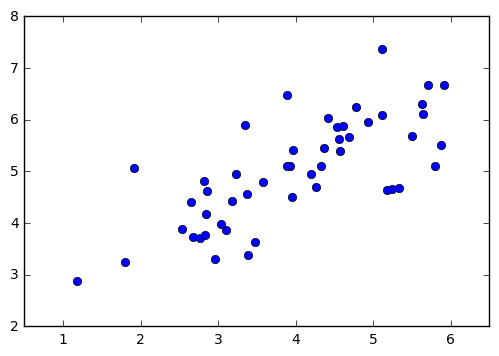

In [4]:
print('Visualizing example dataset for PCA.\n\n')

mat_contents = sio.loadmat(path_to_modules + 'ex7data1.mat')
X = mat_contents['X']

#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.axis([0.5, 6.5, 2, 8])
plt.draw()
plt.show(block=False)

## Part 2: Principal Component Analysis 
Implementing PCA, a dimension reduction technique. 


Running PCA on example dataset.




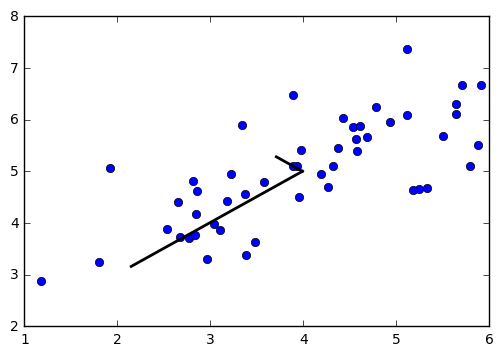

Top eigenvector: 

U[:,0] -0.707106781187 -0.707106781187

(you should expect to see -0.707107 -0.707107)



In [6]:
print('\nRunning PCA on example dataset.\n\n')

#  Before running PCA, it is important to first normalize X
[X_norm, mu, sigma] = featureNormalize(X)

#  Run PCA
[U, S] = pca(X_norm)


#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.

def drawLine(p1, p2, *args, **kwargs):
    x = [p1[0], p2[0]]
    y = [p1[1], p2[1]]
    plt.plot(x, y, *args, **kwargs)

plt.plot(X[:, 0], X[:, 1], 'bo')
drawLine(mu, mu + 1.5 * S[0] * U[:, 0].T, lw=2, color='k')
drawLine(mu, mu + 1.5 * S[1] * U[:, 1].T, lw=2, color='k')
plt.draw()
plt.show(block=False)

print('Top eigenvector: \n')
print('U[:,0]', U[0, 0], U[1, 0])
print('\n(you should expect to see -0.707107 -0.707107)\n')

## Part 3: Dimension Reduction 
  You should now implement the projection step to map the data onto the 
  first k eigenvectors. The code will then plot the data in this reduced 
  dimensional space.  This will show you what the data looks like when 
  using only the corresponding eigenvectors to reconstruct it.


Dimension reduction on example dataset.


Projection of the first example: [ 1.49631261]

(this value should be about 1.481274)


Approximation of the first example: -1.058052792215478 -1.0580527922154785


(this value should be about  -1.047419 -1.047419)




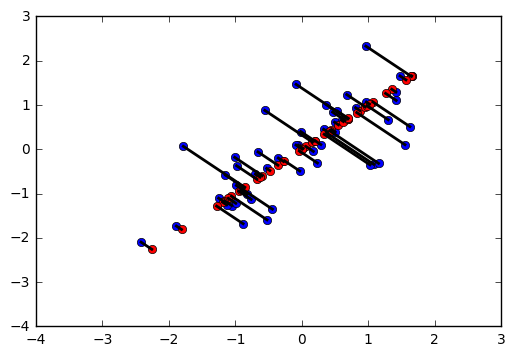

In [10]:
print('\nDimension reduction on example dataset.\n\n')

plt.figure(2)
#  Plot the normalized dataset (returned from pca)
plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo')
plt.axis([-4, 3, -4, 3])
plt.draw()

# Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example:', Z[0])
print('\n(this value should be about 1.481274)\n\n')

X_rec = recoverData(Z, U, K)
print('Approximation of the first example: {} {}\n'.format(X_rec[0, 0], X_rec[0, 1]))
print('\n(this value should be about  -1.047419 -1.047419)\n\n')

#  Draw lines connecting the projected points to the original points
plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro')
plt.draw()
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i, :], X_rec[i, :], lw=2, color='k')
    plt.draw()

plt.show(block=False)

## Part 4: Loading and Visualizing Face Data
  We start the exercise by first loading and visualizing the dataset.
  The following code will load the dataset into your environment


Loading face dataset.




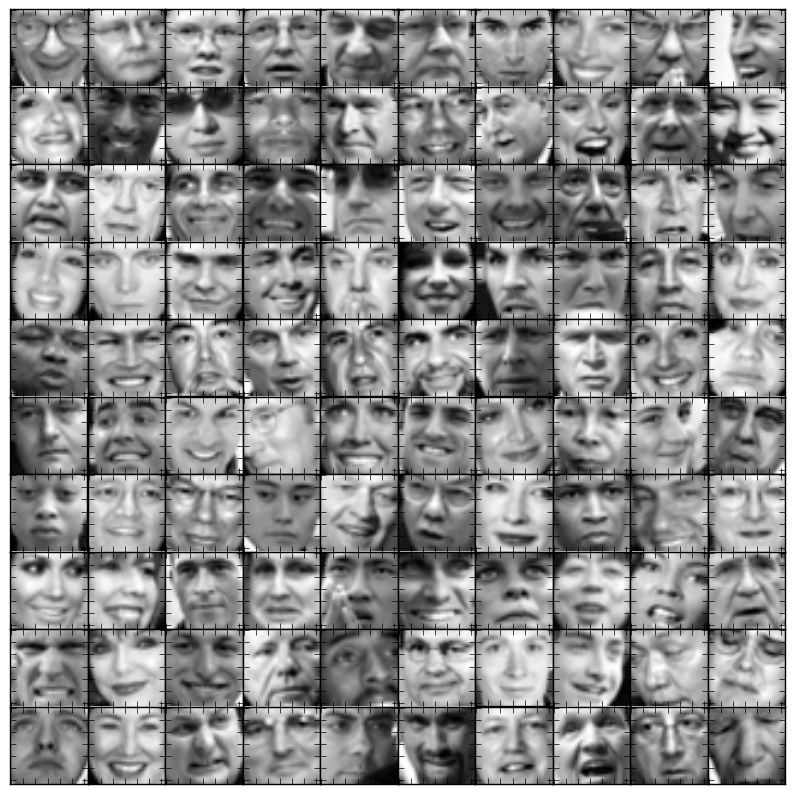

Program paused. Press enter to continue.



NameError: name 'pause' is not defined

In [11]:
print('\nLoading face dataset.\n\n')

#  Load Face dataset
mat_contents = sio.loadmat(path_to_modules + 'ex7faces.mat')
X = mat_contents['X']

#  Display the first 10x10 faces in the dataset
displayData(X)
plt.draw()
plt.show(block=False)

##  Part 5: PCA on Face Data: Eigenfaces 
  Run PCA and visualize the eigenvectors which are in this case eigenfaces
  We display the first 36 eigenfaces.


Running PCA on face dataset.(this might take a minute or two ...)




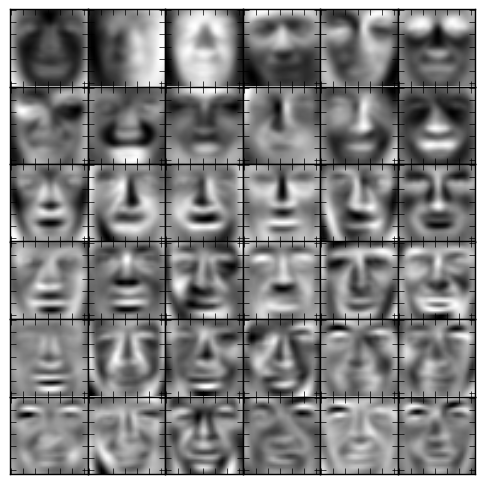

In [12]:
print('\nRunning PCA on face dataset.(this might take a minute or two ...)\n\n')

#  Before running PCA, it is important to first normalize X by subtracting 
#  the mean value from each feature
[X_norm, mu, sigma] = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 6 x 6 eigenvectors found
displayData(U.T, nrows=6, ncols=6)
plt.draw()
plt.show(block=False)

## Part 6: Dimension Reduction for Faces 
  Project images to the eigen space using the top k eigenvectors 
  If you are applying a machine learning algorithm

In [13]:
print('\nDimension reduction for face dataset.\n\n')

K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a size of: ')
print(Z.shape)


Dimension reduction for face dataset.


The projected data Z has a size of: 
(5000, 100)


## Part 7: Visualization of Faces after PCA Dimension Reduction 
  Project images to the eigen space using the top K eigen vectors and 
  visualize only using those K dimensions
  Compare to the original input, which is also displayed


Visualizing the projected (reduced dimension) faces.




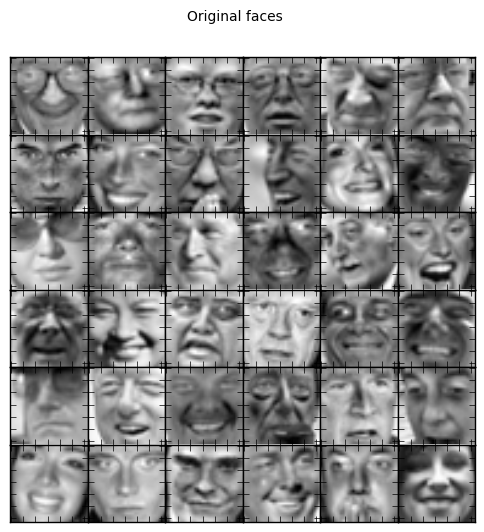

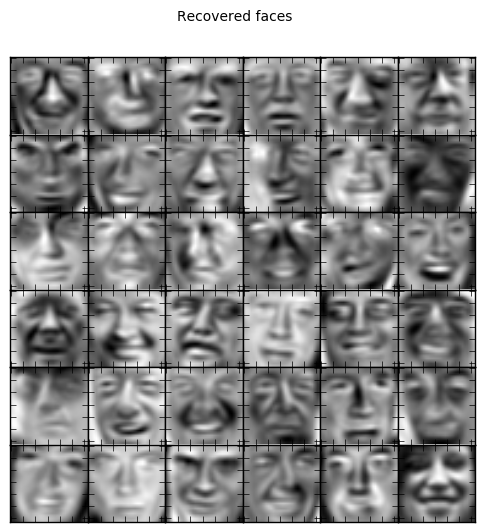

In [14]:
print('\nVisualizing the projected (reduced dimension) faces.\n\n')

K = 100
X_rec = recoverData(Z, U, K)

# Display normalized data
displayData(X_norm, ncols=6, nrows=6)
plt.suptitle('Original faces')
plt.show(block=False)

# Display reconstructed data from only k eigenfaces
displayData(X_rec, ncols=6, nrows=6)
plt.suptitle('Recovered faces')
plt.show(block=False)

## Part 8(a): PCA for Visualization
  One useful application of PCA is to use it to visualize high-dimensional
  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
  pixel colors of an image. We first visualize this output in 3D, and then
  apply PCA to obtain a visualization in 2D.

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


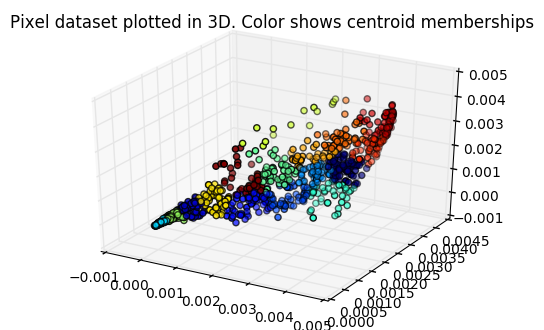

In [15]:
#  Load an image of a bird
A = mpimg.imread(path_to_modules + 'bird_small.png')

A = A / 255  # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
m, n, z = A.shape
X = A.reshape(m * n, 3)
K = 16
max_iters = 10

initial_centroids = kmeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kmeans(X, initial_centroids, max_iters)

#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
sel = np.random.choice(X.shape[0], 1000)

fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')

#  Visualize the data and centroid memberships in 3D
ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], c=idx[sel])
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show(block=False)

## Part 8(b): PCA for Visualization
Use PCA to project this cloud to 2D for visualization

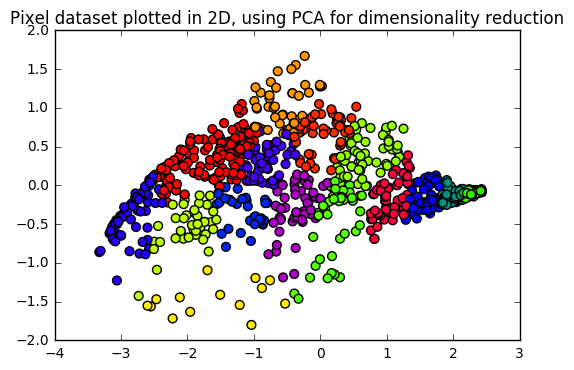

In [16]:
# Subtract the mean to use PCA
X_norm, mu, sigma = featureNormalize(X)

# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)
plt.figure(2)
plot_data_points(Z[sel, :], idx[sel], K)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show(block=False)